# metadata of the dataset

Metadata:
**STATE:**
State abbreviation (a nominal/symbolic field)
**PVASTATE**:
EPVA State or PVA State
Indicates whether the donor lives in a state served by the organization’s EPVA chapter
P = PVA State
E = EPVA State (Northeastern US)
**DOB:**
Date of birth (YYMM, Year/Month format.)
**RECP3**
P3 File Flag_ = Not a P3 Record
X = Donor has given to PVA’s P3 program
**MDMAUD**
The Major Donor Matrix code. The codes describe frequency and amount of
giving for donors who have given a $100+ gift at any time in their giving history. An RFA (recency/frequency/monetary) field. The (current) concatenated version is a nominal or symbolic field. The individual bytes could separately be used as fields and refer to the following:
First byte: Recency of Giving:
*  C=Current Donor
*  L=Lapsed Donor
*  I=Inactive Donor
*  D=Dormant Donor
2nd byte: Frequency of Giving:
*  1=One gift in the period of recency
*  2=Two-Four gifts in the period of recency
*  5=Five+ gifts in the period of recency
3rd byte: Amount of Giving:
*   L=Less than $100(Low Dollar)
*   C=$100-499(Core)
*   M=$500-999(Major)
*   T=$1,000+(Top)
4th byte: Blank/meaningless/filler:
**‘X’**
Indicates that the donor is not a major donor.
**‘GENDER’:**
Gender of the donor
**DOMAIN**
DOMAIN/Cluster code. A nominal or symbolic field.
could be broken down by bytes as explained below.
1st byte = Urbanicity level of the donor’s neighborhood
*   U=Urban
*   C=City
*   S=Suburban
*   T=Town
*   R=Rural
2nd byte = Socio-Economic status of the neighborhood
*   1 = Highest SES
*   2 = Average SES
*   3 = Lowest SES (except for Urban communities, where 1 = Highest SES,2 = Above average SES,3 = Below average SES, 4 = Lowest SES.)
**HOMEOWNR:** Home Owner Flag:
*   H = Home owner
*   U = Unknown
**‘INCOME’** HOUSEHOLD INCOME:
**HV1**  Median Home Value in hundreds.
**HV2** Average Home Value in hundreds.
**HV3**  Median Contract Rent in hundreds.
**HV4** Average Contract Rent in hundreds ‘IC1’.
**IC1**  Median Household Income in hundreds.
**IC2**  Median Family Income in hundreds.
**IC3**  Average Household Income in hundreds.
**IC4** Average Family Income in hundreds.
**IC5** Per Capita Income.
**‘VETERANS’**:
VETERANS (Y/N)
**‘RFA_2’**
Donor’s RFA status as of 97NK promotion date
**CARDPROM:**
Lifetime number of card promotions received to date. Card promotions are promotion type:
*   FS
*   GK
*   TK
*   SK
*   NK
*   XK
*   UF
*   UU
**MAXADATE:**
Date of the most recent promotion received (in YYMM, Year/Month format)
**NUMPROM:**
Lifetime number of promotions received to date
**CARDPM12:**
Number of card promotions received in the last 12 months (in terms of calendar months translates into 9603-9702)
**UMPRM12**
Number of promotions received in the last 12months (in terms of calendar months translates into 9603-9702)
**‘NGIFTALL’:**
Number of lifetime gifts to date.
**‘TIMELAG’:**
Number of months between first and second gift neighborhood demographics
**AGE901:**
Median Age of Population
**AGE902:**
Median Age of Adults 18 or Older
**AGE903:**
Median Age of Adults 25 or Older
**‘AVGGIFT’**
Average git amount

In [1]:
# dependencies


import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

pd.options.display.max_columns =100

In [2]:
# import the data

In [3]:
data = pd.read_csv("HC4A_unit4_ver1.csv")
data

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,TIMELAG_transformed
0,IL,NaN,3712,XXXX,NaN,F,T2,4.0,NaN,479,635,3,2,307,318,349,378,12883,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935,1.386294
1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667,2.890372
2,NC,NaN,0,XXXX,NaN,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481,2.484907
3,CA,NaN,2801,XXXX,NaN,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500,2.197225
4,FL,NaN,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,NaN,4803,XXXX,NaN,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,NaN,59,23,5,12,9702,L4D,24,3.0,3.375000,1.098612
90565,AK,NaN,0,XXXX,NaN,M,C2,4.0,NaN,988,1025,6,6,433,481,499,535,18807,NaN,14,6,5,12,9702,L1G,1,NaN,25.000000,1.826874
90566,TX,NaN,5001,XXXX,NaN,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,NaN,10,4,3,8,9702,L1F,1,NaN,20.000000,1.826874
90567,MI,NaN,3801,XXXX,X,M,C3,3.0,NaN,376,377,4,3,263,264,319,345,12178,NaN,33,14,7,17,9702,L3E,7,3.0,8.285714,1.098612


In [4]:
data.shape

(90569, 29)

In [5]:
# checking data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATE                90569 non-null  object 
 1   PVASTATE             1385 non-null   object 
 2   DOB                  90569 non-null  int64  
 3   MDMAUD               90569 non-null  object 
 4   RECP3                1833 non-null   object 
 5   GENDER               87774 non-null  object 
 6   DOMAIN               88393 non-null  object 
 7   INCOME               90569 non-null  float64
 8   HOMEOWNR             69518 non-null  object 
 9   HV1                  90569 non-null  int64  
 10  HV2                  90569 non-null  int64  
 11  HV3                  90569 non-null  int64  
 12  HV4                  90569 non-null  int64  
 13  IC1                  90569 non-null  int64  
 14  IC2                  90569 non-null  int64  
 15  IC3                  90569 non-null 

In [7]:
data.isna().sum()/len(data)

STATE                  0.000000
PVASTATE               0.984708
DOB                    0.000000
MDMAUD                 0.000000
RECP3                  0.979761
GENDER                 0.030860
DOMAIN                 0.024026
INCOME                 0.000000
HOMEOWNR               0.232431
HV1                    0.000000
HV2                    0.000000
HV3                    0.000000
HV4                    0.000000
IC1                    0.000000
IC2                    0.000000
IC3                    0.000000
IC4                    0.000000
IC5                    0.000000
VETERANS               0.891287
NUMPROM                0.000000
CARDPROM               0.000000
CARDPM12               0.000000
NUMPRM12               0.000000
MAXADATE               0.000000
RFA_2                  0.000000
NGIFTALL               0.000000
TIMELAG                0.106582
AVGGIFT                0.000000
TIMELAG_transformed    0.000000
dtype: float64

In [8]:
# check categorical columns

In [9]:
categoricals = data.select_dtypes(object)
categoricals

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,NaN,XXXX,NaN,F,T2,NaN,NaN,L4E
1,CA,NaN,XXXX,NaN,M,S1,H,NaN,L2G
2,NC,NaN,XXXX,NaN,M,R2,U,NaN,L4E
3,CA,NaN,XXXX,NaN,F,R2,U,NaN,L4E
4,FL,NaN,XXXX,X,F,S2,H,NaN,L2F
...,...,...,...,...,...,...,...,...,...
90564,FL,NaN,XXXX,NaN,F,S2,H,NaN,L4D
90565,AK,NaN,XXXX,NaN,M,C2,NaN,NaN,L1G
90566,TX,NaN,XXXX,NaN,M,C1,H,NaN,L1F
90567,MI,NaN,XXXX,X,M,C3,NaN,NaN,L3E


In [10]:
# delete columns with 80% empty values

In [11]:
data = data.drop(columns=["PVASTATE", "RECP3", "VETERANS"], axis=1)

In [12]:
data.columns

Index(['STATE', 'DOB', 'MDMAUD', 'GENDER', 'DOMAIN', 'INCOME', 'HOMEOWNR',
       'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5',
       'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12', 'MAXADATE', 'RFA_2',
       'NGIFTALL', 'TIMELAG', 'AVGGIFT', 'TIMELAG_transformed'],
      dtype='object')

In [13]:
# inspection of single column HOMEOWN
data['HOMEOWNR'].value_counts(dropna=False)/len(data)

H      0.548157
NaN    0.232431
U      0.219413
Name: HOMEOWNR, dtype: float64

In [14]:
# delete the column

# the amount of nans with U label amount to 44% which is highly uncertain
# any method here will introduce lot bias (where you data analysts need to convince us)

data = data.drop(columns="HOMEOWNR", axis=1)

In [15]:
# clean GENDER
data.GENDER.value_counts()

F    48668
M    37132
U     1635
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [16]:
def clean_gender_col(x):
    if x in ["U", "J", "C", "A"]:
        return "non_binary"
    else:
        return x
    
data["GENDER"] = data["GENDER"].apply(clean_gender_col) # clean_gender_col(data["GENDER"])
data["GENDER"] = data["GENDER"].apply(lambda x: clean_gender_col(x))


In [17]:
data["GENDER"].value_counts()

F             48668
M             37132
non_binary     1974
Name: GENDER, dtype: int64

# Map iterator

In [18]:
# CODE ISRA TO REVIEW (MAP)

#map = {'U' : 'Nonbinary', 'J' : 'Nonbinary', 'C' : 'Nonbinary', 'A': 'Nonbinary', 'F' : 'F', 'M' : 'M'}

#data['GENDER'] = data['GENDER'].map(map)

In [19]:
# function to return double of a number

def addition(x):
    return 2*x

numbers=(1,2,3,4,5)
res= map(addition,numbers)





In [20]:
res

In [21]:
result= list(res)
result

[2, 4, 6, 8, 10]

In [22]:
def myfunc(a, b):
    return a + b

x = list(map(myfunc, ('apple', 'banana', 'cherry'), ('orange', 'lemon', 'pineapple')))
x

['appleorange', 'bananalemon', 'cherrypineapple']

In [23]:
# column DOMAIN

In [24]:
data.DOMAIN.value_counts(dropna=False)/len(data)

R2     0.143603
T2     0.129371
S1     0.119975
S2     0.088927
C2     0.086498
C1     0.063962
C3     0.055825
T1     0.052027
R3     0.050481
U1     0.047025
U2     0.034350
U3     0.027427
NaN    0.024026
T3     0.023098
S3     0.020062
U4     0.019157
R1     0.014188
Name: DOMAIN, dtype: float64

In [25]:
# VISUALIZE CATEGORICAL VARIABLES VS TARGET

In [26]:
y = data.AVGGIFT
y

0         7.741935
1        15.666667
2         7.481481
3         6.812500
4         6.864865
           ...    
90564     3.375000
90565    25.000000
90566    20.000000
90567     8.285714
90568    96.794872
Name: AVGGIFT, Length: 90569, dtype: float64

<AxesSubplot:ylabel='Density'>

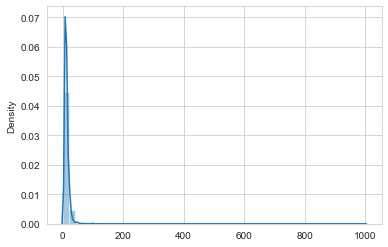

In [27]:
sns.distplot(x=data.AVGGIFT)

In [28]:
# Gender vs AVGGIFT

In [29]:
data.GENDER.value_counts()

F             48668
M             37132
non_binary     1974
Name: GENDER, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='AVGGIFT'>

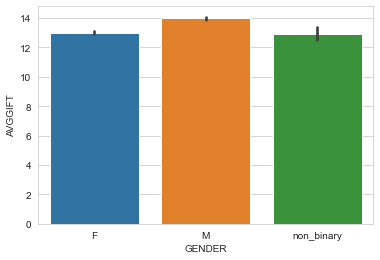

In [30]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data) # mean of the 3 categories

In [31]:
data[["GENDER", "AVGGIFT"]].groupby("GENDER")["AVGGIFT"].mean()

GENDER
F             13.012336
M             13.970821
non_binary    12.899708
Name: AVGGIFT, dtype: float64

<AxesSubplot:xlabel='GENDER', ylabel='AVGGIFT'>

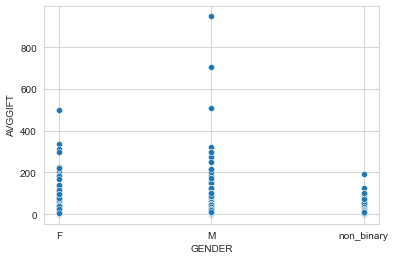

In [32]:
sns.scatterplot(x="GENDER", y="AVGGIFT", data=data)

<AxesSubplot:xlabel='GENDER', ylabel='AVGGIFT'>

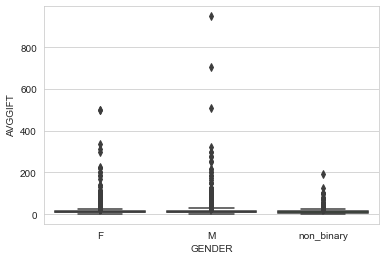

In [33]:
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)

In [34]:
data

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,TIMELAG_transformed
0,IL,3712,XXXX,F,T2,4.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,1.386294
1,CA,5202,XXXX,M,S1,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,2.890372
2,NC,0,XXXX,M,R2,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,2.484907
3,CA,2801,XXXX,F,R2,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,2.197225
4,FL,2001,XXXX,F,S2,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,4803,XXXX,F,S2,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,3.0,3.375000,1.098612
90565,AK,0,XXXX,M,C2,4.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,NaN,25.000000,1.826874
90566,TX,5001,XXXX,M,C1,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,NaN,20.000000,1.826874
90567,MI,3801,XXXX,M,C3,3.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,3.0,8.285714,1.098612


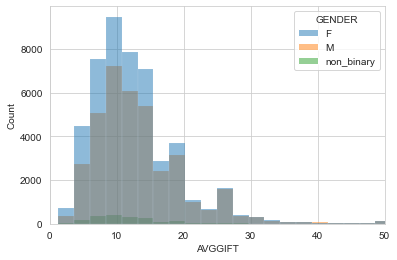

In [35]:
fig, ax = plt.subplots(1,1)
sns.histplot(x="AVGGIFT", hue= "GENDER", data=data, bins=400)
ax.set_xlim((0,50))
plt.show()

In [36]:
data.GENDER.value_counts()

F             48668
M             37132
non_binary     1974
Name: GENDER, dtype: int64

In [37]:
# transformations on the target you need to use transformations that you know how to come back
# eg y=ln(x) ---> e^y

# outliers out of the varible AVGGIFT

In [38]:
#outliers are outside of Q1 - 1.5 IQR, Q3+1.5IQR

# decision of taking outliers out for each modality of the categorical variable  "GENDER"



In [39]:
data.GENDER.value_counts()

F             48668
M             37132
non_binary     1974
Name: GENDER, dtype: int64

In [40]:
for x in ["F", "M", "non_binary"]:
    # Select the first quantile
    q1 = data['AVGGIFT'][data.GENDER == x].quantile(.25)
    # Select the third quantile
    q3 = data['AVGGIFT'][data.GENDER == x].quantile(.75)
    # Create a mask inbeetween q1 & q3
    data['AVGGIFT'][data.GENDER == x].between((q1-1.5*(q3-q1)), (q3 + 1.5*(q3-q1)), inclusive=True)

In [41]:
# transformations on the numerical variables

In [42]:
# dealing with STATE VARIABLE

In [43]:
data.STATE.value_counts()

CA    16284
FL     7959
TX     7166
IL     6124
MI     5375
NC     3956
WA     3383
GA     3261
IN     2855
WI     2656
MO     2583
TN     2396
AZ     2278
MN     2081
OR     2045
CO     1929
SC     1660
AL     1627
OK     1553
KY     1542
LA     1533
KS     1233
IA     1214
AR      969
MS      948
NV      923
NM      824
NE      715
UT      546
ID      504
MT      498
HI      423
SD      278
AK      275
WY      267
ND      241
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [44]:
def state(x):
    if x in list2: # list states that have less than 2500
        return "other"
    else:
        return x

In [45]:
data

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,TIMELAG_transformed
0,IL,3712,XXXX,F,T2,4.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,1.386294
1,CA,5202,XXXX,M,S1,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,2.890372
2,NC,0,XXXX,M,R2,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,2.484907
3,CA,2801,XXXX,F,R2,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,2.197225
4,FL,2001,XXXX,F,S2,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,4803,XXXX,F,S2,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,3.0,3.375000,1.098612
90565,AK,0,XXXX,M,C2,4.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,NaN,25.000000,1.826874
90566,TX,5001,XXXX,M,C1,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,NaN,20.000000,1.826874
90567,MI,3801,XXXX,M,C3,3.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,3.0,8.285714,1.098612


In [46]:
# get the modalities of the variable STATE that have less than 2500 entries
#values = pd.DataFrame(data.STATE.value_counts()).reset_index()
#values.columns= ["state", "counts"]
#group_states = values[values.counts < 2500]

#group_states = values[values.counts < 2500]
#list2 = list(group_states.state)
#list2

In [47]:
#data.STATE = list(map(state, data["STATE"]))
# data["STATE"]= dat

In [48]:
#data.STATE.value_counts()

In [49]:
#state = pd.DataFrame([data['STATE'].value_counts()<2500]).T
#state

In [ ]:
# alternative solution

In [50]:
def states(data):
    data2 = data.copy()
    state = pd.DataFrame([data2['STATE'].value_counts()<2500]).T
    mask = state.loc[state['STATE']==True].index
    return data2[data2['STATE'].isin(mask)]
#df2 = states(df)

In [51]:
def states(data):
    df = data.copy()
    state = pd.DataFrame([df['STATE'].value_counts()<2500]).T
    mask = state.loc[state['STATE']==True].index
    
    return df[df['STATE'].isin(mask)]
#df2 = states(df)

In [60]:
df2 = states(data)

In [61]:
df2

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,TIMELAG_transformed
5,AL,0,XXXX,NaN,T2,2.0,807,899,3,3,364,410,406,454,15619,35,15,6,12,9702,L1F,4,6.0,12.750000,1.791759
7,LA,0,XXXX,F,T2,2.0,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,L3E,5,6.0,6.200000,1.791759
8,IA,0,XXXX,M,R2,3.0,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,L1F,11,8.0,18.090909,2.079442
9,TN,3211,XXXX,M,T1,2.0,565,581,3,3,291,329,311,332,10517,28,11,4,9,9702,L1F,3,7.0,9.333333,1.945910
10,KS,0,XXXX,F,R3,2.0,231,273,2,1,173,222,220,273,9045,14,6,5,12,9702,L1F,1,NaN,20.000000,1.826874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90557,CO,0,XXXX,F,T2,3.0,737,700,4,4,275,308,293,304,12953,75,31,6,15,9702,L2G,14,10.0,9.285714,2.302585
90560,LA,2801,XXXX,F,C1,6.0,922,1244,4,4,342,410,408,485,24775,30,11,4,10,9702,L1F,3,10.0,9.666667,2.302585
90561,AL,0,XXXX,F,R3,4.0,457,522,2,2,263,276,333,342,10803,27,11,6,14,9702,L3E,4,2.0,9.750000,0.693147
90562,KY,4506,XXXX,F,R2,1.0,341,421,2,1,159,185,214,236,7542,38,17,6,12,9702,L4E,10,3.0,5.900000,1.098612


In [59]:
data

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,TIMELAG_transformed
0,IL,3712,XXXX,F,T2,4.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,1.386294
1,CA,5202,XXXX,M,S1,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,2.890372
2,NC,0,XXXX,M,R2,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,2.484907
3,CA,2801,XXXX,F,R2,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,2.197225
4,FL,2001,XXXX,F,S2,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,4803,XXXX,F,S2,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,3.0,3.375000,1.098612
90565,AK,0,XXXX,M,C2,4.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,NaN,25.000000,1.826874
90566,TX,5001,XXXX,M,C1,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,NaN,20.000000,1.826874
90567,MI,3801,XXXX,M,C3,3.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,3.0,8.285714,1.098612


In [53]:
# you need here to do the same procedure as before of maping with the map function
# the indexes

TN    2396
AZ    2278
MN    2081
OR    2045
CO    1929
SC    1660
AL    1627
OK    1553
KY    1542
LA    1533
KS    1233
IA    1214
AR     969
MS     948
NV     923
NM     824
NE     715
UT     546
ID     504
MT     498
HI     423
SD     278
AK     275
WY     267
ND     241
AP      78
NY      70
VA      54
OH      52
PA      36
MD      30
MA      25
NJ      24
CT      20
AA      15
AE      14
ME      11
NH       8
VT       6
RI       6
VI       5
DE       3
WV       3
GU       3
DC       1
AS       1
Name: STATE, dtype: int64

In [54]:
df2 = states(data)

In [55]:
df2.STATE.value_counts()

TN    2396
AZ    2278
MN    2081
OR    2045
CO    1929
SC    1660
AL    1627
OK    1553
KY    1542
LA    1533
KS    1233
IA    1214
AR     969
MS     948
NV     923
NM     824
NE     715
UT     546
ID     504
MT     498
HI     423
SD     278
AK     275
WY     267
ND     241
AP      78
NY      70
VA      54
OH      52
PA      36
MD      30
MA      25
NJ      24
CT      20
AA      15
AE      14
ME      11
NH       8
VT       6
RI       6
VI       5
DE       3
WV       3
GU       3
DC       1
AS       1
Name: STATE, dtype: int64

In [56]:
# grouping data

# regular expressions

In [62]:
import re

In [63]:
# method findall returns a list containing all matches.

In [64]:
txt= "hello world! hello."
re.findall("\w", txt)

['h', 'e', 'l', 'l', 'o', 'w', 'o', 'r', 'l', 'd', 'h', 'e', 'l', 'l', 'o']

In [65]:
txt= "hello world! hello."
re.findall("\w+", txt)

['hello', 'world', 'hello']

In [67]:
txt= "hello world! hello. blahbscd"

In [68]:
re.findall("\w+", txt)

['hello', 'world', 'hello', 'blahbscd']

In [69]:
re.findall("\W", txt)

[' ', '!', ' ', '.', ' ']

In [70]:
txt= "hello world! 123, hello"
re.findall("\d", txt)

['1', '2', '3']

In [71]:
re.findall("\d+", txt)

['123']

In [72]:
text = "That person wears nice shoes"
pattern = "[A-z]"
re.findall(pattern, text)

['T',
 'h',
 'a',
 't',
 'p',
 'e',
 'r',
 's',
 'o',
 'n',
 'w',
 'e',
 'a',
 'r',
 's',
 'n',
 'i',
 'c',
 'e',
 's',
 'h',
 'o',
 'e',
 's']

In [73]:
text = "The weird caaat ct played with other caats"
pattern= "a+"
re.findall(pattern, text)

['aaa', 'a', 'aa']

In [90]:
text = "My phone number is  9 98654 4567 875 986 and my social security is 320-456-986"
pattern = "\d{2,5}" # matches with 2 digits min and 5 max
re.findall(pattern, text)

['98654', '4567', '875', '986', '320', '456', '986']

In [92]:
text = "The weird caaat ct played with other caats"
pattern1= "ca*t" # you look for cs, ts and 0 as or more 
pattern2= "ca+t" # you look for cs, ts and at least one a
re.findall(pattern1, text), re.findall(pattern2, text) 

(['caaat', 'ct', 'caat'], ['caaat', 'caat'])

In [96]:
txt = "It is spelled gray (ir grey)? grrr"
pattern = "gr[a,e]y"
re.findall(pattern, txt)

['gray', 'grey']

In [97]:
txt = "It is spelled gray (ir grey)? grrr"
pattern = "gray| grey"
re.findall(pattern, txt)

['gray', ' grey']

In [75]:
# EXERCISE: model the variable y in terms of the other variables
# it will be a regression task

In [98]:
# part 2

In [ ]:
# Activity:

Use the column MDMAUD to reduce the number of categories to two (XXXX and other).

#ACTIVITY 3

def clean_MAUD(x):
    if (x != "XXXX" ):
        return "other"
    else:
        return x

data['MDMAUD'] = data['MDMAUD'].apply(clean_MAUD)
# data['MDMAUD'] = list(map(clean_MAUD,data['MDMAUD']))
#End of Activity 3

# Now IC2
data['IC2'].value_counts()

# Let's try first with four equally spaced bins
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category'] = pd.cut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category']].head(10)

data['ic2_category'].value_counts()

Bad job!!! Class imbalance!

ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_quartiles'] = pd.qcut(data['IC2'],4,labels=ic2_labels)
data[['IC2','ic2_category_quartiles']].head(10)

data['ic2_category_quartiles'].value_counts()

Nicer!!!

# Another approach
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['ic2_category_userdef'] = pd.cut(data['IC2'],[0,300,500,1000,10000],labels=ic2_labels)
data[['IC2','ic2_category_userdef']].head(10)

data['ic2_category_userdef'].value_counts()

Not so good

sns.boxplot(x="ic2_category", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

sns.boxplot(x="ic2_category_quartiles", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()

sns.boxplot(x="ic2_category_userdef", y=np.where(data.AVGGIFT>150,150,data.AVGGIFT), data=data)
plt.show()